<a href="https://colab.research.google.com/github/evgenygrobov/Git_demo/blob/main/Maximum_Likelihood_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd

df = pd.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [6, 3, 3, 1, 2], 'C': [7, 9, 1, 2, 2]})
df.iloc[:, 1].values
#df['B'].values

array([6, 3, 3, 1, 2])

In [63]:
import numpy as np
import scipy.stats as stats
draw=np.random.choice(range(1,12), 2)
from random import choice

In [101]:
def flip_coin(n, p) -> np.array:
    return stats.binom.rvs(n=1,p=p,size=n)


In [99]:
flip_coin(20,0.8)

array([2, 0, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2])

In [95]:
def coin_log_likelihood(p, flips):
    """Return the log-likelihood of a parameter p given a sequence of coin flips.
    """
    return np.sum(np.log(np.array([1 - p, p])[flips]))

In [96]:
flip_data = np.array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0])
coin_log_likelihood(p=0.25, flips=flip_data)

-6.172657590522138

In [97]:
coin_log_likelihood(p=0.5, flips=flip_data)

-6.931471805599453

In [103]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def plot_coin_likelihood(ax: matplotlib.axes.Axes, 
                         ps: np.array,
                         data: np.array) -> None:
    xs = np.arange(len(ps))
    xlabels = [str(p) for p in ps]
    likelihoods = [coin_log_likelihood(p=p, flips=data) 
                   for p in ps]
    ax.bar(xs, likelihoods, align='center', alpha=0.5)
    ax.set_xticks(xs)
    ax.set_xticklabels(xlabels)
    ax.set_xlabel("$p$")
    ax.set_ylabel("Binomial Likelihood")
    ax.set_title(",".join(np.array(['T', 'H'])[data]))

In [104]:
probabilities = [0.25, 0.5]


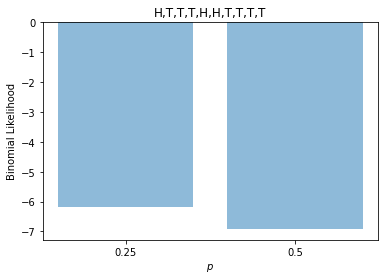

In [105]:
fig, ax = plt.subplots(figsize=(6, 4))

plot_coin_likelihood(ax, ps=probabilities, data=flip_data)

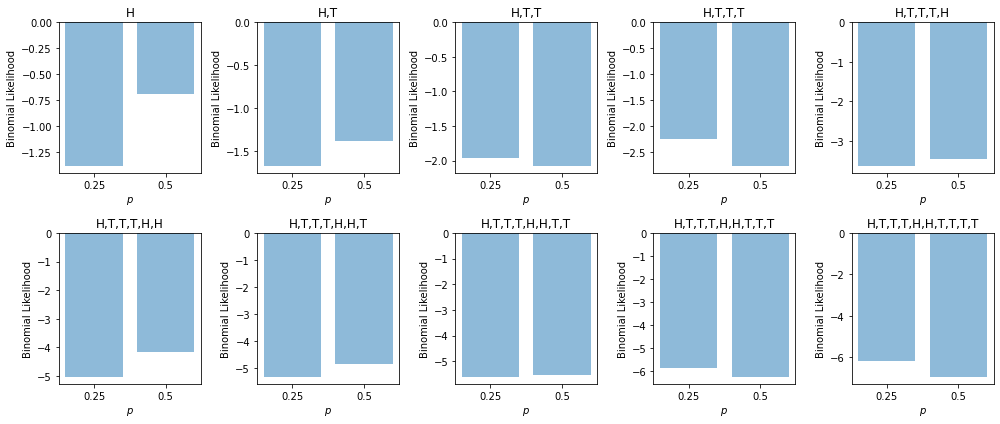

In [106]:
fig, axs = plt.subplots(2, 5, figsize=(14, 6))

for idx, ax in enumerate(axs.flatten(), start=1):
    plot_coin_likelihood(ax, data=flip_data[:idx], ps=probabilities)
fig.tight_layout()

In [107]:
probabilities = [0.1, 0.25, 0.5, 0.75, 0.9]

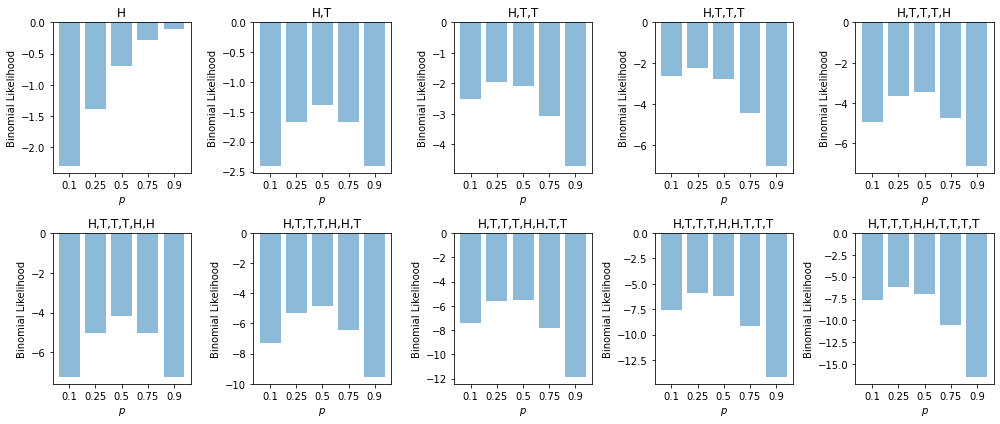

In [108]:
fig, axs = plt.subplots(2, 5, figsize=(14, 6))

for idx, ax in enumerate(axs.flatten(), start=1):
    plot_coin_likelihood(ax, data=flip_data[:idx], ps=probabilities)
    ax.set_title(",".join(np.array(['T', 'H'])[flip_data[:idx]]))
fig.tight_layout()